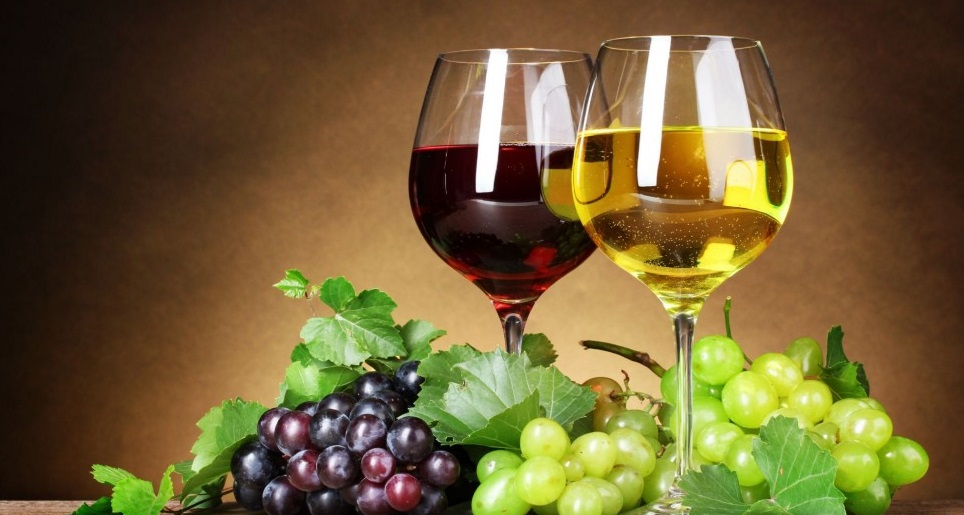

# BUSINESS UNDERSTANDING

In [1]:
# Case de dados para CLASSIFICAÇÃO
# Identificar o tipo de vinho de acordo com as características de vinho tinto e branco presente na base de dados

# DATA UNDERSTANDING

In [2]:
# Base de dados disponibilizada no kaggle para efeito de testes e estudos

[Wine dataset](https://www.kaggle.com/datasets/dell4010/wine-dataset)

# Title

In [3]:
# Aplicando machine learning em base de dados do kaggle

# Head

In [4]:
# estudando machine learning
# by geanclm em 20/02/2022 at 11:47h
# update by geanclm on 24/10/2023

# Local files

In [5]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning

01/11/2023  13:01    <DIR>          .
29/10/2023  16:48    <DIR>          ..
24/10/2023  09:36                68 .gitattributes
30/10/2023  21:44    <DIR>          .ipynb_checkpoints
02/11/2023  11:15    <DIR>          balanceamento_dados
24/10/2023  09:36             1.091 LICENSE
31/10/2023  19:43           548.448 ML_vinhos_csv.ipynb
24/10/2023  09:36                50 README.md
01/11/2023  13:01           131.951 Vinho-Tinto-e-Vinho-Branco.jpg
31/10/2023  19:04        10.006.697 wine_classifier_etc.joblib
24/10/2023  09:36           384.016 wine_dataset.csv
               7 arquivo(s)     11.072.321 bytes
               4 pasta(s)   895.025.893.376 bytes dispon¡veis


# Library installation

In [6]:
# !pip install -U imbalanced-learn
# !pip install imblearn

# Import libs

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# balancemaneto dos dados em relação ao MAIOR valor de y
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# balancemaneto dos dados em relação ao MENOR valor de y
from imblearn.under_sampling import RandomUnderSampler

# Padronizar os dados
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

import joblib

# Load data

In [8]:
df = pd.read_csv(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_dataset.csv')

In [11]:
df.sample(15).T

3904    3522     6171    6155     1444    2657  \
fixed_acidity             7.0     8.2      5.6     6.1      7.3     7.5   
volatile_acidity         0.36    0.37     0.22     0.2     0.67    0.21   
citric_acid               0.3    0.27     0.32     0.4     0.02    0.34   
residual_sugar            5.0     1.7      1.2     1.9      2.2     1.2   
chlorides                0.04   0.028    0.024   0.028    0.072    0.06   
free_sulfur_dioxide      40.0    10.0     29.0    32.0     31.0    26.0   
total_sulfur_dioxide    143.0    59.0     97.0   138.0     92.0   111.0   
density               0.99173  0.9923  0.98823  0.9914  0.99566  0.9931   
pH                       3.33    2.97      3.2    3.26     3.32    3.51   
sulphates                0.42    0.48     0.46    0.72     0.68    0.47   
alcohol                  12.2    10.4    13.05    11.7     11.1    10.7   
quality                     7       5        7       5        6       6   
style                   white   white    white   white      red   white   

                        2689     1598     2379     4666    3535    1973  \
fixed_acidity            8.3      6.0      6.0      7.3     9.2     5.1   
volatile_acidity        0.21     0.31    0.395     0.28    0.27    0.33   
citric_acid             0.58     0.47      0.0     0.42    0.34    0.22   
residual_sugar          17.1      3.6      1.4      1.2    10.5     1.6   
chlorides              0.049    0.067    0.042    0.033   0.043   0.027   
free_sulfur_dioxide     62.0     18.0      7.0     29.0    49.0    18.0   
total_sulfur_dioxide   213.0     42.0     55.0    142.0   228.0    89.0   
density               1.0006  0.99549  0.99135  0.99205  0.9974  0.9893   
pH                      3.01     3.39     3.37     3.17    3.04    3.51   
sulphates               0.51     0.66     0.38     0.43    0.41    0.38   
alcohol                  9.3     11.0     11.2     10.7    10.4    12.5   
quality                    6        6        4        4       6       7   
style                  white      red    white    white   white   white   

                         1511     4339    2265  
fixed_acidity             7.1      6.3     6.8  
volatile_acidity         0.69      0.2    0.22  
citric_acid              0.04     0.19    0.37  
residual_sugar            2.1     12.3     1.7  
chlorides               0.068    0.048   0.036  
free_sulfur_dioxide      19.0     54.0    38.0  
total_sulfur_dioxide     27.0    145.0   195.0  
density               0.99712  0.99668  0.9908  
pH                       3.44     3.16    3.35  
sulphates                0.67     0.42    0.72  
alcohol                   9.8      9.3    12.5  
quality                     5        6       6  
style                     red    white   white

# Exploratory Analysis

In [84]:
# filtrar dado específico do data frame
df.loc[0:4,'style']

0    0
1    0
2    0
3    0
4    0
Name: style, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
df.dtypes[df.dtypes.values == 'object'].index

Index(['style'], dtype='object')

In [13]:
df.shape

(6497, 13)

In [14]:
df.describe().T

count        mean        std      min       25%  \
fixed_acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile_acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric_acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual_sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free_sulfur_dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total_sulfur_dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed_acidity           7.00000    7.70000   15.90000  
volatile_acidity        0.29000    0.40000    1.58000  
citric_acid             0.31000    0.39000    1.66000  
residual_sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free_sulfur_dioxide    29.00000   41.00000  289.00000  
total_sulfur_dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

In [87]:
# verificação de existência de dados nulos
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [88]:
# Em caso de haver dados nulos analisar melhor estratégia para a situação pontual

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA PREPARATION
        </b>
    <br/>&nbsp;
</center>

In [16]:
df['style'] = df['style'].replace('red', 0)
df['style'] = df['style'].replace('white', 1)

In [17]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  style  
0      9.4        5      0  
1      9.8        5      0  
2      9.8        5      0  
3      9.8        6      0  
4      9.4        5      0

In [18]:
# 1 - VERIFICAR NECESSIDADE DE APLICAR O GET DUMMIES para cada base de dados
# df_d = pd.get_dummies(df)
# df_d.sample(5)

# DATA VISUALIZATION

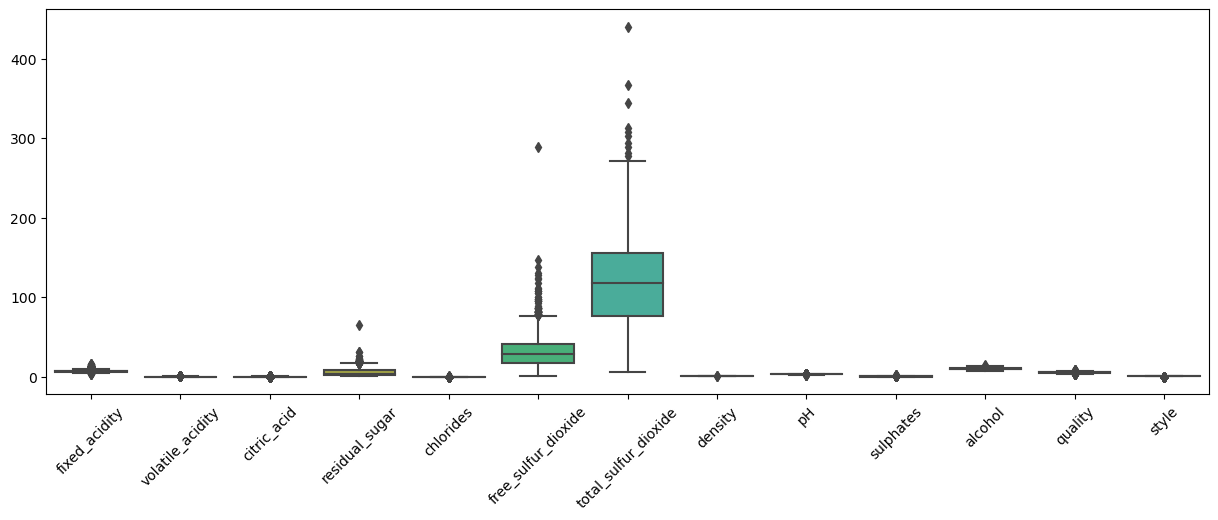

In [19]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df)

# Rotacionar a legenda do eixo x em 45 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show();

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            MODELING
        </b>
    <br/>&nbsp;
</center>

In [20]:
# Divisão dos dados em X e y
X = df.drop('style', axis = 1)
y = df['style']
X.shape, y.shape

((6497, 12), (6497,))

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [22]:
y.mean()

0.7538864091118977

In [23]:
df.groupby('style').size()

style
0    1599
1    4898
dtype: int64

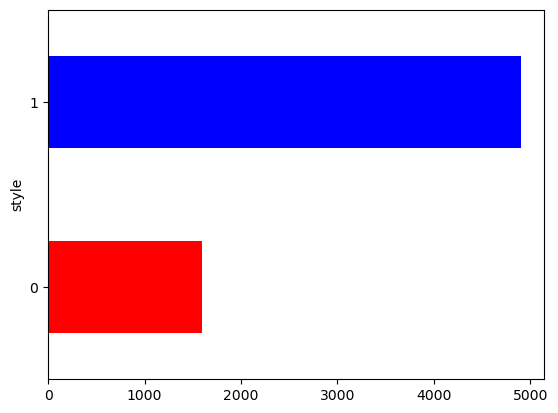

In [24]:
y.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

In [25]:
y.value_counts()

style
1    4898
0    1599
Name: count, dtype: int64

# Data balancing

In [26]:
# balancemaneto dos dados em relação ao MAIOR valor de y
smote_ball = SMOTE()
X_bal, y_bal = smote_ball.fit_resample(X, y)

# balancemaneto dos dados em relação ao MENOR valor de y
# rus = RandomUnderSampler()
# X_bal, y_bal = rus.fit_resample(X, y)

In [27]:
y_bal.value_counts()

style
0    4898
1    4898
Name: count, dtype: int64

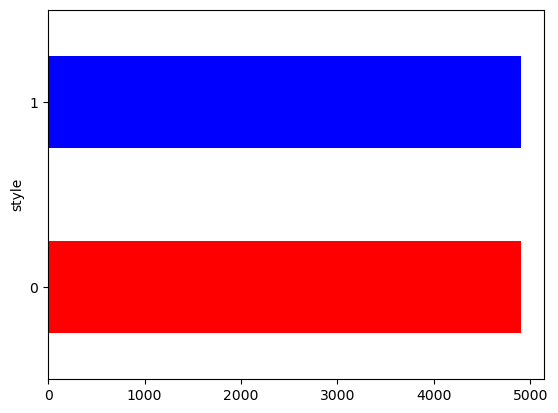

In [28]:
y_bal.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

# Standardization

In [29]:
obj_padronizado = StandardScaler().fit(X_bal)
df_padronizado = obj_padronizado.transform(X_bal)
df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = list(X_bal.columns)
df_padronizado.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.123000          1.607101    -1.899246       -0.605708   0.235128   
1       0.145709          2.583132    -1.899246       -0.437919   0.793075   
2       0.145709          1.932445    -1.647093       -0.509829   0.640907   
3       2.429740         -0.670305     1.630900       -0.605708   0.209767   
4      -0.123000          1.607101    -1.899246       -0.605708   0.235128   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.845064             -0.970671  0.873460  1.660201  -0.081433   
1            -0.028914             -0.419167  0.513815 -0.308086   0.674426   
2            -0.611878             -0.636426  0.585744  0.072873   0.485462   
3            -0.495285             -0.536152  0.945389 -0.562059   0.044544   
4            -0.845064             -0.970671  0.873460  1.660201  -0.081433   

    alcohol   quality  
0 -0.941764 -0.803244  
1 -0.584017 -0.803244  
2 -0.584017 -0.803244  
3 -0.584017  0.383570  
4 -0.941764 -0.803244

In [30]:
df_padronizado.describe().T

count          mean       std       min       25%  \
fixed_acidity         9796.0 -9.284348e-17  1.000051 -2.541386 -0.660420   
volatile_acidity      9796.0 -1.624761e-16  1.000051 -1.754784 -0.778752   
citric_acid           9796.0  0.000000e+00  1.000051 -1.899246 -0.575441   
residual_sugar        9796.0  0.000000e+00  1.000051 -0.917317 -0.605708   
chlorides             9796.0 -3.365576e-16  1.000051 -1.464074 -0.601792   
free_sulfur_dioxide   9796.0  1.276598e-16  1.000051 -1.428027 -0.786767   
total_sulfur_dioxide  9796.0  2.321087e-17  1.000051 -1.438614 -0.920534   
density               9796.0 -2.484724e-14  1.000051 -2.971147 -0.681479   
pH                    9796.0 -6.731152e-16  1.000051 -3.355758 -0.689045   
sulphates             9796.0 -1.044489e-16  1.000051 -2.223034 -0.648327   
alcohol               9796.0 -1.115572e-15  1.000051 -2.193879 -0.852328   
quality               9796.0  5.570609e-16  1.000051 -3.176874 -0.803244   

                           50%       75%        max  
fixed_acidity        -0.226085  0.414419   5.587078  
volatile_acidity     -0.236513  0.720476   6.378809  
citric_acid          -0.008097  0.622287   8.565115  
residual_sugar       -0.485859  0.305148  14.711064  
chlorides            -0.170651  0.357058  13.803379  
free_sulfur_dioxide  -0.155062  0.557550  15.361331  
total_sulfur_dioxide -0.051497  0.733979   5.814503  
density               0.154170  0.695599  15.683646  
pH                   -0.013087  0.694387   4.834859  
sulphates            -0.115424  0.485462   8.988878  
alcohol              -0.206503  0.668097   3.977257  
quality               0.383570  0.383570   3.944015

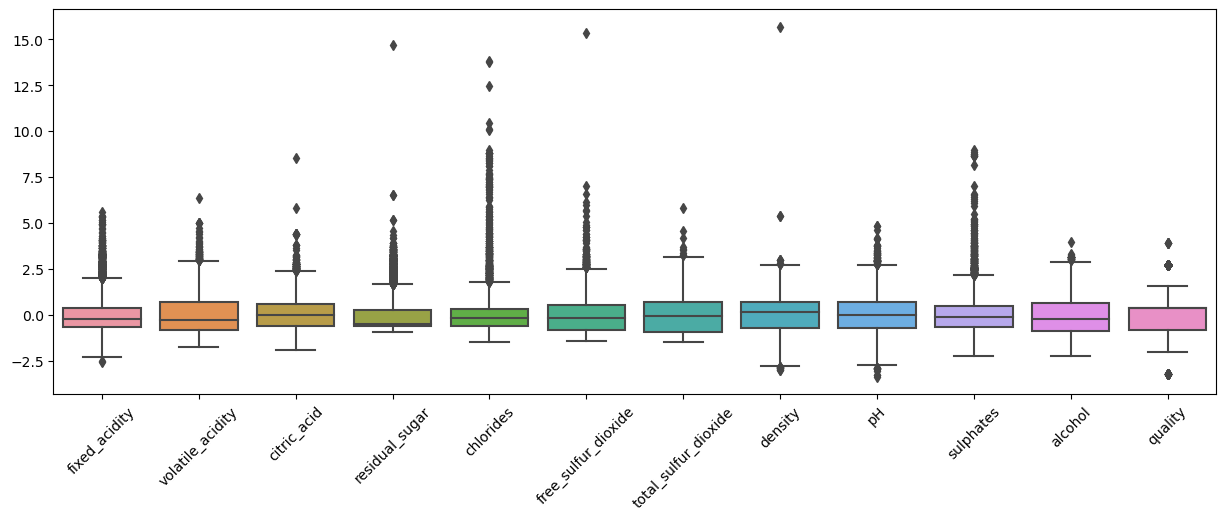

In [31]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_padronizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Normalization

In [32]:
obj_normalizado = MinMaxScaler().fit(X_bal)
df_normalizado = obj_normalizado.transform(X_bal)
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = list(X_bal.columns)
df_normalizado.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  
0  0.202899  0.333333  
1  0.260870  0.333333  
2  0.260870  0.333333  
3  0.260870  0.500000  
4  0.202899  0.333333

In [33]:
df_normalizado.describe().T

count      mean       std  min       25%       50%  \
fixed_acidity         9796.0  0.312653  0.123031  0.0  0.231405  0.284839   
volatile_acidity      9796.0  0.215745  0.122953  0.0  0.120000  0.186667   
citric_acid           9796.0  0.181497  0.095567  0.0  0.126506  0.180723   
residual_sugar        9796.0  0.058696  0.063989  0.0  0.019939  0.027607   
chlorides             9796.0  0.095895  0.065502  0.0  0.056478  0.084718   
free_sulfur_dioxide   9796.0  0.085056  0.059565  0.0  0.038194  0.075820   
total_sulfur_dioxide  9796.0  0.198344  0.137879  0.0  0.071429  0.191244   
density               9796.0  0.159270  0.053608  0.0  0.122739  0.167534   
pH                    9796.0  0.409708  0.122097  0.0  0.325581  0.408110   
sulphates             9796.0  0.198274  0.089195  0.0  0.140449  0.187980   
alcohol               9796.0  0.355507  0.162053  0.0  0.217391  0.322044   
quality               9796.0  0.446134  0.140439  0.0  0.333333  0.500000   

                           75%  max  
fixed_acidity         0.363636  1.0  
volatile_acidity      0.304325  1.0  
citric_acid           0.240964  1.0  
residual_sugar        0.078221  1.0  
chlorides             0.119282  1.0  
free_sulfur_dioxide   0.118264  1.0  
total_sulfur_dioxide  0.299539  1.0  
density               0.196558  1.0  
pH                    0.494486  1.0  
sulphates             0.241573  1.0  
alcohol               0.463768  1.0  
quality               0.500000  1.0

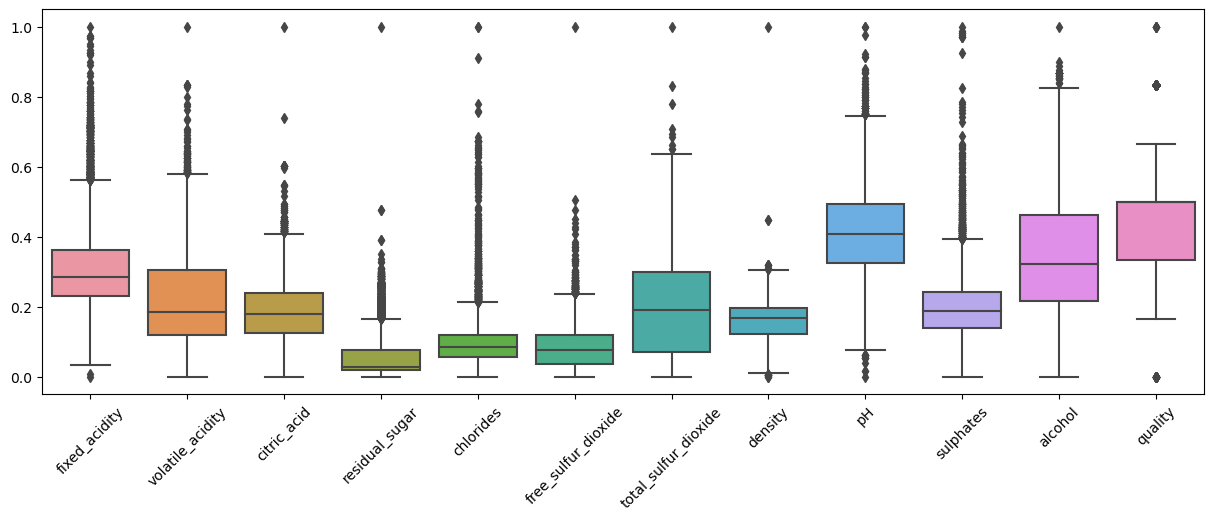

In [34]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_normalizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [35]:
# Separar base de dados em treino e teste
VAR_PREDICTOR = df_padronizado
VAR_TARGET = y_bal
from sklearn.model_selection import train_test_split as tts
X_tr, X_ts, y_tr, y_ts = tts(VAR_PREDICTOR,VAR_TARGET, test_size= 0.3)
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape, y_tr.value_counts()[0], y_tr.value_counts()[1]

((6857, 12), (2939, 12), (6857,), (2939,), 3412, 3445)

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Extra Trees Classifier
        </b>
    <br/>&nbsp;
</center>

[ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

In [36]:
# Treinar o modelo
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
etc.fit(X_tr, y_tr)

ExtraTreesClassifier(max_depth=10, n_estimators=500, n_jobs=-1)

In [37]:
# PROPENSÃO respectiva, nas colunas, da variável resposta ser 0 e 1
etc.predict_proba(X_ts)

array([[0.96499399, 0.03500601],
       [0.96403969, 0.03596031],
       [0.95199765, 0.04800235],
       ...,
       [0.08940753, 0.91059247],
       [0.03074349, 0.96925651],
       [0.22637756, 0.77362244]])

In [38]:
pd.DataFrame(etc.predict_proba(X_ts), columns=['Propensão 0', 'Propensão 1']).head()

Propensão 0  Propensão 1
0     0.964994     0.035006
1     0.964040     0.035960
2     0.951998     0.048002
3     0.992912     0.007088
4     0.967841     0.032159

In [39]:
etc_y_pred = etc.predict(X_ts)

# EVALUATION

In [40]:
# Max e Min
etc_y_pred.min(), etc_y_pred.max()

(0, 1)

In [41]:
# Curva ROC
roc_auc_score(y_ts, etc_y_pred)

0.9976446837146702

In [42]:
# SCORE
etc_acuracia = etc.score(X_ts, y_ts)
print("score AUTO:", etc_acuracia)

score AUTO: 0.9976182374957469


In [43]:
# ACURÁCIA
etc_acuracia = accuracy_score(y_ts, etc_y_pred)
print("accuracy_score AUTO:", etc_acuracia)

accuracy_score AUTO: 0.9976182374957469


In [44]:
# MATRIZ CONFUSÃO
etc_confusion_matrix = confusion_matrix(y_ts, etc_y_pred)
etc_confusion_matrix

array([[1479,    7],
       [   0, 1453]], dtype=int64)

|                     | negativo PRED 0    |    positivo PRED 1   |
|-                    |--------------------|----------------------|
| *negativo REAL 0*   |      VN            |             FP       |
| *positivo REAL 1*   |      FN            |             VP       |

In [45]:
# CÁLCULO MANUAL DA ACURÁCIA
etc_acuracia_manual = (etc_confusion_matrix[0][0] + etc_confusion_matrix[1][1])/(etc_confusion_matrix[0][0] + etc_confusion_matrix[0][1] + etc_confusion_matrix[1][0] + etc_confusion_matrix[1][1])
print(f'Acurácia MANUAL:, {etc_acuracia_manual}')

Acurácia MANUAL:, 0.9976182374957469


In [46]:
print(classification_report(y_ts, etc_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1486
           1       1.00      1.00      1.00      1453

    accuracy                           1.00      2939
   macro avg       1.00      1.00      1.00      2939
weighted avg       1.00      1.00      1.00      2939



In [47]:
etc_f1_score = f1_score(y_ts, etc_y_pred)
etc_f1_score

0.9975969790593889

In [48]:
X_ts[400:413].T

8056      9610      8138      5122      7796  \
fixed_acidity        -0.471092 -0.692412  0.470801 -1.063484 -0.981522   
volatile_acidity      0.972986  0.244613  1.271301 -0.941424  0.718931   
citric_acid          -1.100081  0.033940 -1.834182 -0.953671 -1.432747   
residual_sugar       -0.640178 -0.539506 -0.616538  1.263945 -0.588926   
chlorides             0.395261  0.108322  0.109952 -0.474986 -0.514546   
free_sulfur_dioxide  -0.695710 -0.704412 -0.989868  4.401611 -1.268294   
total_sulfur_dioxide -1.020808 -1.137793 -1.229979  1.920548 -1.355053   
density               0.308305 -0.371369  0.550364  0.121801 -0.328042   
pH                    1.528474  1.130086  0.554173 -1.260484  1.281776   
sulphates             0.217361  1.723233 -0.140372 -1.719128  1.325711   
alcohol              -0.309786  0.720623 -0.635922 -1.210075  0.519612   
quality              -0.803244  0.383570  0.383570 -0.803244  0.383570   

                          7493      9717      6890      1303      7616  \
fixed_acidity         1.620971  0.428060  2.026676  0.280064 -0.319038   
volatile_acidity      0.097721  0.786540  0.264125 -0.670305 -0.995245   
citric_acid           2.285882 -0.242028  1.981288  0.874440  1.186351   
residual_sugar        0.304246 -0.577994 -0.522093 -0.629678 -0.629500   
chlorides             0.105246  0.513508  0.941128  0.361934 -0.697580   
free_sulfur_dioxide   0.782456 -0.145507 -1.136546  0.145975 -1.019519   
total_sulfur_dioxide -0.274893  0.903321 -1.201922 -0.402454 -1.238191   
density               0.980154  0.507350  0.685265 -0.129950 -0.693737   
pH                   -0.428620  0.091226  0.072873  0.707804  0.889786   
sulphates             1.698967  0.034703  0.753511  0.548450 -0.082370   
alcohol               1.383591 -0.751012  0.969698  0.668097  1.740673   
quality               0.383570 -0.803244  0.383570 -0.803244  0.383570   

                          9583      6834      3962  
fixed_acidity        -0.618865  0.826811 -0.593242  
volatile_acidity      0.894837 -0.453409 -0.887200  
citric_acid          -1.899246  0.204225 -0.260250  
residual_sugar       -0.554518 -0.566257  1.959072  
chlorides             0.146795  0.468484 -0.348180  
free_sulfur_dioxide  -1.111350 -0.786767  1.078717  
total_sulfur_dioxide -1.374031 -1.221355  1.502742  
density              -0.078016  0.012905  0.952582  
pH                    1.783963 -0.539573  1.088763  
sulphates            -0.098516  0.072546 -0.963269  
alcohol               0.859098  0.222165 -0.673454  
quality               0.383570  0.383570 -0.803244

In [49]:
selection_y_ts = list(y_ts[400:410].values)
selection_y_ts

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [50]:
prediction = list(etc.predict(X_ts[400:410]))
print(prediction)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [52]:
if (selection_y_ts != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(selection, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "selection", "prediction"])
    display (dfp)
    display (dfp.predictio.value_counts())
else:
    print(f'O modelo previu corretamente os resultados em relação a variável "y_ts"')
    print(list(set(selection_y_ts) - set(prediction)))

O modelo previu corretamente os resultados em relação a variável "y_ts"
[]


# VISUAL

In [53]:
# PROPENSÃO (NÃO É probabilidade)
pred = etc.predict_proba(X_ts)[:,1]

In [54]:
pred.min(), pred.max()

(0.0038079639990966406, 0.9940050859006897)

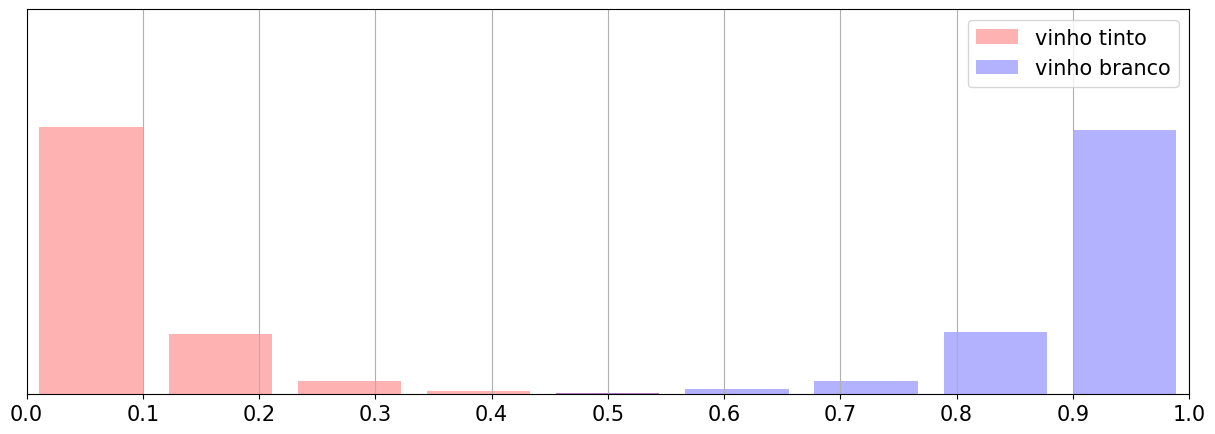

In [55]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=np.linspace(0,1,10), density=True, color='r', alpha=.3, rwidth=.8, label='vinho tinto')
plt.hist(pred[y_ts==1], bins=np.linspace(0,1,10), density=True, color='b', alpha=.3, rwidth=.8, label='vinho branco')

plt.xlim(0, 1)
plt.ylim(0, 10)

plt.xticks(np.arange(0,1.1,0.1), fontsize=15)
plt.yticks([])
plt.legend(fontsize=15)
plt.grid();

# PERSISTENCE

In [56]:
# Salvar
# joblib.dump(etc, r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_classifier_etc.joblib')

In [57]:
# Carregar Modelo Salvo
# model = joblib.load(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_classifier_etc.joblib')
# prediction_persistence = model.predict(X_ts[400:410])
# print(list(prediction_persistence))

# DEPLOYMENT

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            KNeighbors Classifier
        </b>
    <br/>&nbsp;
</center>

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [58]:
# Treinar o modelo
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=3)

In [59]:
neigh_y_pred = neigh.predict(X_ts)

In [60]:
# MATRIZ CONFUSÃO
neigh_confusion_matrix = confusion_matrix(y_ts, neigh_y_pred)
neigh_confusion_matrix

array([[1481,    5],
       [  11, 1442]], dtype=int64)

In [61]:
# ACURÁCIA
neigh_acuracia = accuracy_score(y_ts, neigh_y_pred)
print("Acurácia:", neigh_acuracia)

Acurácia: 0.99455597141885


In [62]:
print(classification_report(y_ts, neigh_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1486
           1       1.00      0.99      0.99      1453

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [63]:
neigh_f1_score = f1_score(y_ts, neigh_y_pred)
neigh_f1_score

0.9944827586206897

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Decision Tree Classifier
        </b>
    <br/>&nbsp;
</center>

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [64]:
# Treinar o modelo
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_tr, y_tr)

DecisionTreeClassifier()

In [65]:
dtc_y_pred = dtc.predict(X_ts)

In [66]:
# MATRIZ CONFUSÃO
dtc_confusion_matrix = confusion_matrix(y_ts, dtc_y_pred)
dtc_confusion_matrix

array([[1471,   15],
       [  20, 1433]], dtype=int64)

In [67]:
# ACURÁCIA
dtc_acuracia = accuracy_score(y_ts, dtc_y_pred)
print("Acurácia:", dtc_acuracia)

Acurácia: 0.9880911874787343


In [68]:
print(classification_report(y_ts, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1486
           1       0.99      0.99      0.99      1453

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [69]:
dtc_f1_score = f1_score(y_ts, dtc_y_pred)
dtc_f1_score

0.9879351947604273

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Logistic Regression
        </b>
    <br/>&nbsp;
</center>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [70]:
# Treinar o modelo
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter =1500)
lr.fit(X_tr, y_tr)

LogisticRegression(max_iter=1500, random_state=0)

In [71]:
lr_y_pred = lr.predict(X_ts)

In [72]:
# MATRIZ CONFUSÃO
lr_confusion_matrix = confusion_matrix(y_ts, lr_y_pred)
lr_confusion_matrix

array([[1475,   11],
       [   9, 1444]], dtype=int64)

In [73]:
# ACURÁCIA
lr_acuracia = accuracy_score(y_ts, lr_y_pred)
print("Acurácia:", lr_acuracia)

Acurácia: 0.9931949642735625


In [74]:
print(classification_report(y_ts, lr_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1486
           1       0.99      0.99      0.99      1453

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [75]:
lr_f1_score = f1_score(y_ts, lr_y_pred)
lr_f1_score

0.9931224209078403

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Random Forest Classifier
        </b>
    <br/>&nbsp;
</center>

[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1_000, max_depth=8, n_jobs=-1)
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1)

In [77]:
rf_y_pred = lr.predict(X_ts)

In [78]:
# MATRIZ CONFUSÃO
rf_confusion_matrix = confusion_matrix(y_ts, rf_y_pred)
rf_confusion_matrix

array([[1475,   11],
       [   9, 1444]], dtype=int64)

In [79]:
# ACURÁCIA
rf_acuracia = accuracy_score(y_ts, rf_y_pred)
print("Acurácia:", rf_acuracia)

Acurácia: 0.9931949642735625


In [80]:
print(classification_report(y_ts, rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1486
           1       0.99      0.99      0.99      1453

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [81]:
rf_f1_score = f1_score(y_ts, lr_y_pred)
rf_f1_score

0.9931224209078403

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Avaliação geral de todos os Modelos
        </b>
    <br/>&nbsp;
</center>

In [82]:
dfm = {
    'modelo':['Extra Trees Classifier', 'KNeighbors Classifier', 'Decision Tree Classifier',
              'Logistic Regression', 'Random Forest Classifier'],
    'acurácia':[etc_acuracia,neigh_acuracia,dtc_acuracia,lr_acuracia, rf_acuracia],
    'f1_score':[etc_f1_score,neigh_f1_score,dtc_f1_score,lr_f1_score, rf_f1_score]
    }    
modelos = pd.DataFrame(dfm)

In [83]:
# modelos.sort_values('f1_score', ascending=False)
modelos.style.highlight_max(subset=['acurácia','f1_score'])